In [99]:
import numpy as np
import matplotlib.pyplot as plt
ART = np.load('../Data/ProcessedData/ValrawART.npy')
II = np.load('../Data/ProcessedData/ValrawII.npy')
PPG = np.load('../Data/ProcessedData/ValrawPLETH.npy')



In [17]:
OriSig = ART[5]

In [3]:
from scipy.fft import fft, ifft

# Define the filters in frequency domain
def apply_amplitude_filter(signal, A=0.5):
    # Apply amplitude scaling in frequency domain
    Y_f = A * fft(signal)
    return np.real(ifft(Y_f))

def apply_phase_filter(signal, phi=np.pi/4):
    # Apply phase shift in frequency domain
    N = len(signal)
    f = np.fft.fftfreq(N)
    Y_f = fft(signal) * np.exp(1j * phi * f)
    return np.real(ifft(Y_f))

def apply_delay_filter(signal, tau=0.1):
    # Apply delay in frequency domain
    N = len(signal)
    f = np.fft.fftfreq(N)
    Y_f = fft(signal) * np.exp(-1j * 2 * np.pi * f * tau)
    return np.real(ifft(Y_f))

# Apply filters
amplitude_filtered = apply_amplitude_filter(OriSig, 0.9)
phase_filtered = apply_phase_filter(OriSig, 150)
delay_filtered = apply_delay_filter(OriSig, 150)


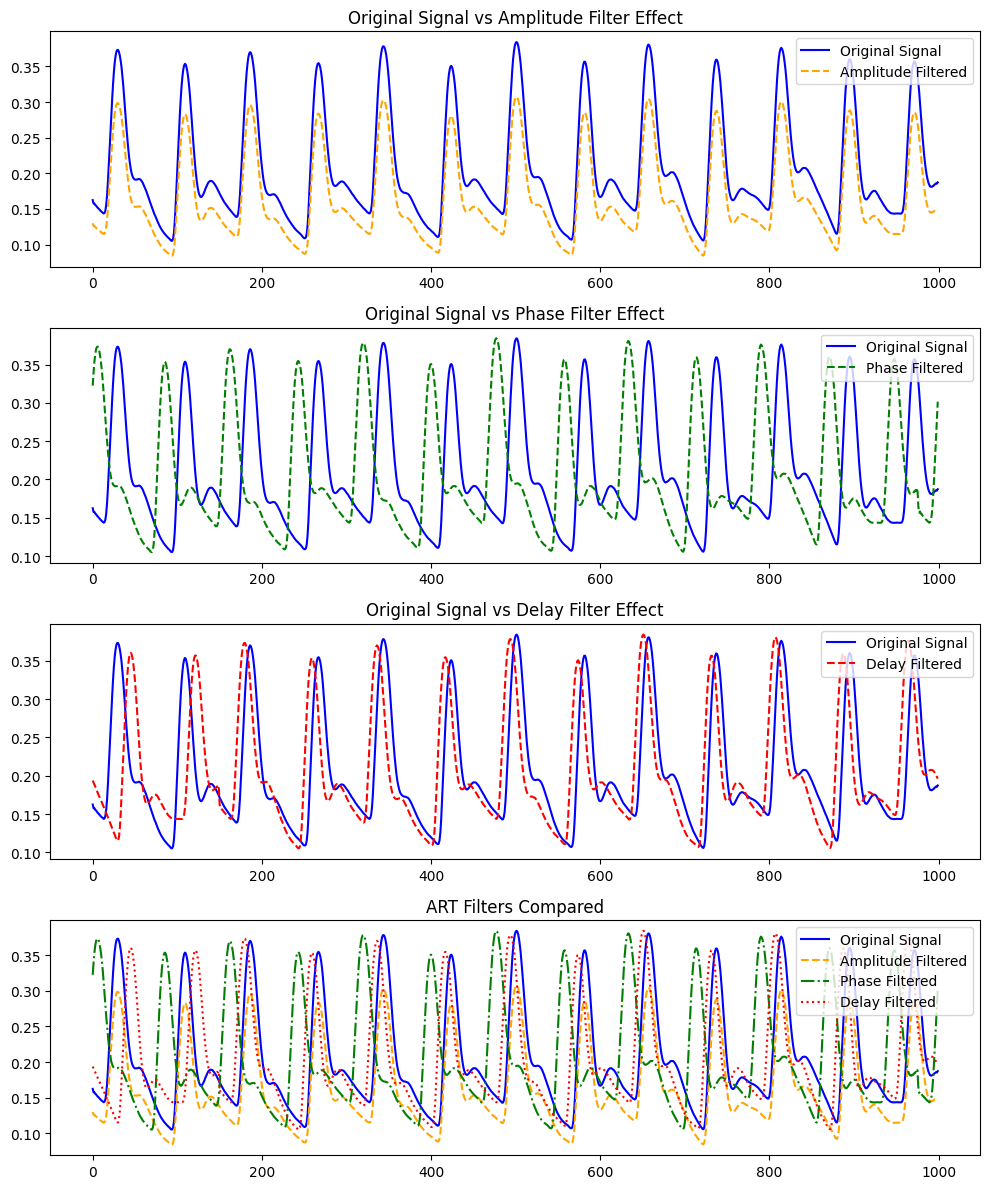

In [38]:
# Create subplot figure with overlaid signals
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Original signal and Amplitude filtered signal
axs[0].plot( OriSig, label='Original Signal', color='blue')
axs[0].plot( amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--')
axs[0].legend(loc='upper right')
axs[0].set_title('Original Signal vs Amplitude Filter Effect')

# Original signal and Phase filtered signal
axs[1].plot( OriSig, label='Original Signal', color='blue')
axs[1].plot( phase_filtered, label='Phase Filtered', color='green', linestyle='--')
axs[1].legend(loc='upper right')
axs[1].set_title('Original Signal vs Phase Filter Effect')

# Original signal and Delay filtered signal
axs[2].plot( OriSig, label='Original Signal', color='blue')
axs[2].plot( delay_filtered, label='Delay Filtered', color='red', linestyle='--')
axs[2].legend(loc='upper right')
axs[2].set_title('Original Signal vs Delay Filter Effect')

# All effects in one plot for comparison
axs[3].plot( OriSig, label='Original Signal', color='blue')
axs[3].plot( amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--')
axs[3].plot( phase_filtered, label='Phase Filtered', color='green', linestyle='-.')
axs[3].plot( delay_filtered, label='Delay Filtered', color='red', linestyle=':')
axs[3].legend(loc='upper right')
axs[3].set_title('ART Filters Compared')

# Adjust layout
plt.tight_layout()
plt.show()


### 진폭 필터 (Amplitude Filter)
진폭 필터는 신호의 진폭을 조정합니다. 시간 영역에서 필터링 연산은 다음과 같이 표현할 수 있습니다:

$$ y(t) = A \cdot x(t) $$

여기서 \( A \)는 진폭 스케일 인자입니다. 주파수 영역에서, 이는 각 주파수 성분의 크기를 \( A \)배로 조정하는 것에 해당합니다.


### 위상 필터 (Phase Filter)
위상 필터는 신호의 각 주파수 성분에 위상 변화를 추가합니다. 주파수 영역에서의 필터링 연산은 다음과 같이 주어집니다:

$$ Y(f) = X(f) \cdot e^{j\phi} $$

여기서 $ \phi $는 위상 변화를 나타내고, \( j \)는 허수 단위입니다. 시간 영역에서, 이는 신호를 $ \phi $만큼의 위상으로 이동시키는 것을 의미합니다.


### 지연 필터 (Delay Filter)
지연 필터는 시간 영역에서 신호에 지연을 도입합니다. 주파수 영역에서의 연산은 다음과 같이 표현됩니다:

$$ Y(f) = X(f) \cdot e^{-j2\pi f \tau} $$

여기서 $ \tau $는 시간 지연을 나타냅니다. 이는 모든 주파수 성분에 선형 위상 변화를 추가하는 것으로, 시간 영역에서 전체 신호를 $ \tau $만큼 이동시키는 것과 동일합니다.




### 위상 필터 (Phase Filter)

위상 필터는 신호의 각 주파수 성분에 일정한 위상 변화를 추가합니다. 이는 신호의 형태를 변경하지 않고 신호를 시간 축에서 이동시키는 것처럼 보입니다.

- 위상 변화는 모든 주파수 성분에 대해 동일하게 적용됩니다. 즉, 주파수에 관계없이 모든 성분이 같은 위상 변화를 경험합니다.
- 결과적으로, 신호의 모양은 그대로 유지되지만, 신호의 시작점이 변경됩니다.

### 지연 필터 (Delay Filter)

지연 필터는 신호 전체를 시간 축에서 일정한 시간만큼 지연시킵니다. 이것은 신호의 모든 주파수 성분에 선형적인 위상 변화를 추가함으로써 이루어집니다.

- 지연은 주파수에 따라 다른 위상 변화를 일으킵니다. 즉, 높은 주파수 성분은 낮은 주파수 성분보다 더 큰 위상 변화를 겪습니다.
- 이는 신호가 시작하는 시점이 아닌 전체 신호가 일정한 시간 동안 지연되는 것을 의미합니다.

**주요 차이점**
은 위상 필터가 모든 주파수 성분에 동일한 위상 변화를 적용하는 반면, 지연 필터는 각 주파수 성분에 다른 양의 위상 변화를 주어 신호를 지연시킨다는 것입니다. 위상 변화는 신호의 형태에 영향을 주지 않지만, 지연은 신호의 모든 성분을 동일한 시간만큼 뒤로 옮깁니다.

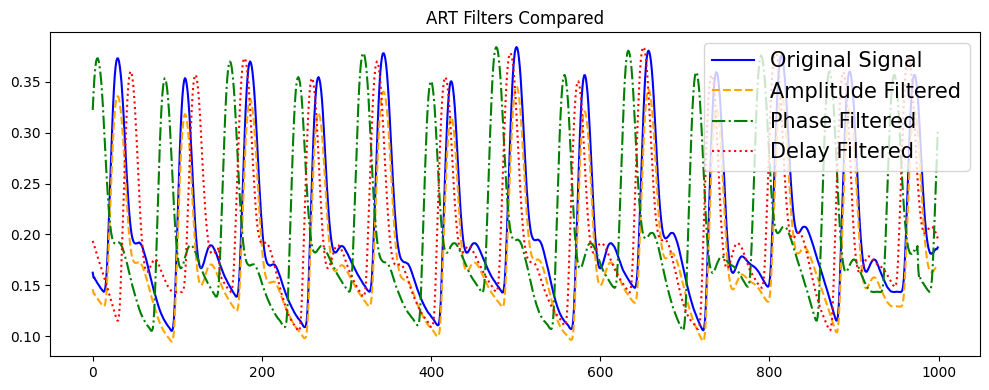

In [4]:
# Create subplot figure with overlaid signals
plt.figure(figsize=(10, 4))

# All effects in one plot for comparison
plt.plot( OriSig, label='Original Signal', color='blue')
plt.plot( amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--')
plt.plot( phase_filtered, label='Phase Filtered', color='green', linestyle='-.')
plt.plot( delay_filtered, label='Delay Filtered', color='red', linestyle=':')
plt.legend(loc='upper right', fontsize=15)
plt.title('ART Filters Compared')

# Adjust layout
plt.tight_layout()
#plt.show()
plt.savefig('./ART Filters.png', transparent =True)

In [96]:
'''
OriSig = ART[5].copy()
OriSigNoise = OriSig.copy()
OriSigNoise[100:250] += np.random.normal(0,0.02,150)

# Apply filters
amplitude_filtered = apply_amplitude_filter(OriSig, 0.9)
phase_filtered = apply_phase_filter(OriSig, 150)
delay_filtered = apply_delay_filter(OriSig, 150)
'''
OriSig = II[5][:400].copy()
OriSigNoise = OriSig.copy()
OriSigNoise[100:230] += np.random.normal(0,0.007,130)


# Apply filters
amplitude_filtered = apply_amplitude_filter(OriSig, 0.985)
phase_filtered = apply_phase_filter(OriSig, 100)
delay_filtered = apply_delay_filter(OriSig, 100)

"\n# All effects in one plot for comparison\nfig, ax = plt.subplots(figsize=(10, 4))\nax.plot(OriSig, label='Original Signal', color='blue')\nax.plot(amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--')\nax.plot(phase_filtered, label='Phase Filtered', color='green', linestyle='-.')\nax.plot(delay_filtered, label='Delay Filtered', color='red', linestyle=':')\nax.legend(loc='upper right')\nax.set_title('ART Filters Compared')\nfig.tight_layout()\nfig.savefig(Sigtype+'_Filters_Compared.png', transparent =True)\n"

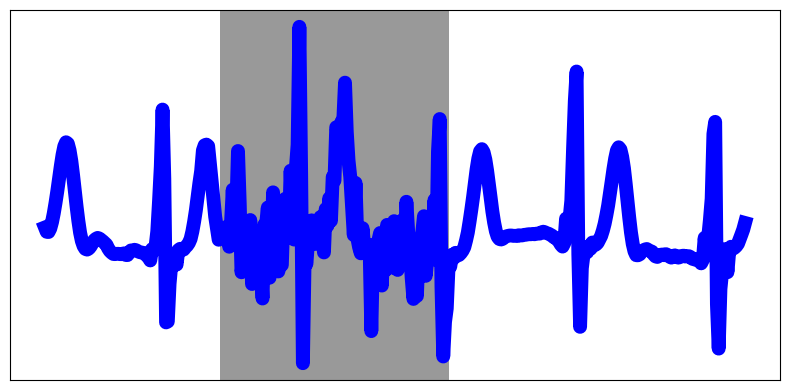

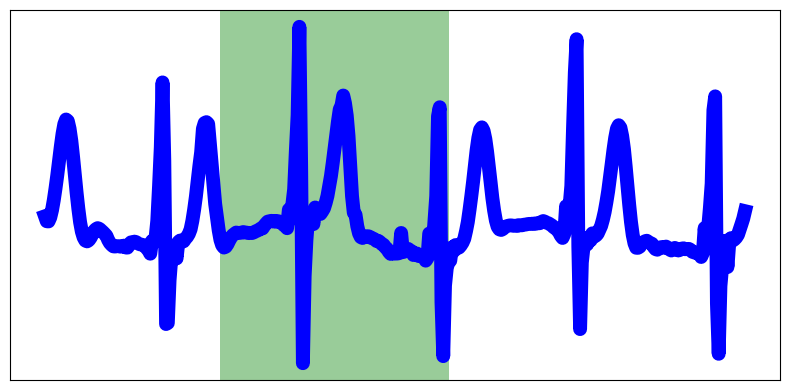

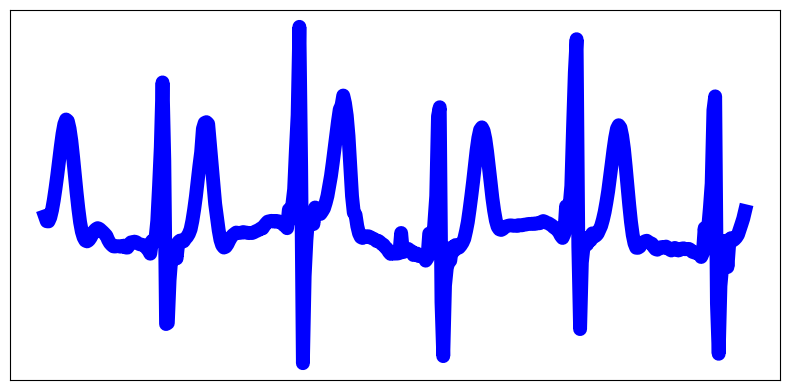

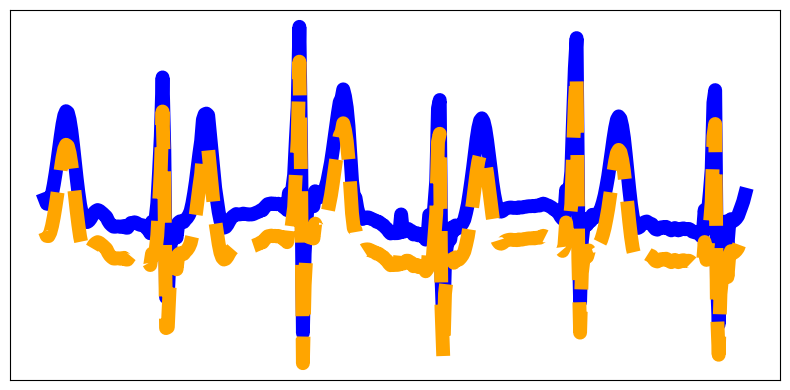

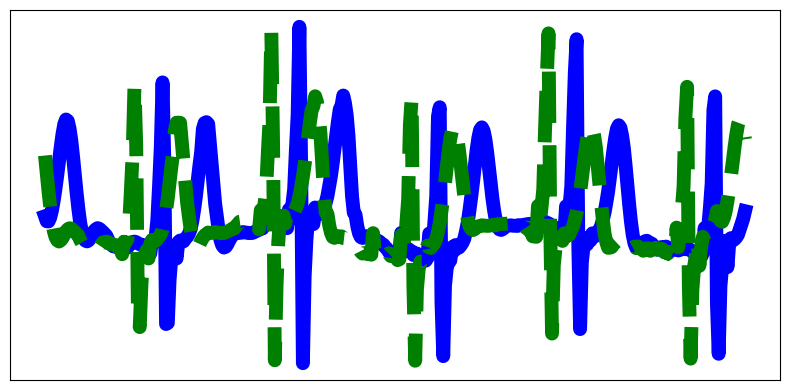

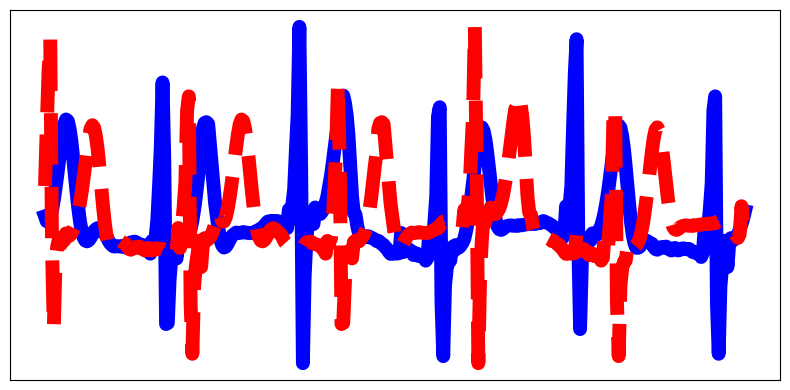

In [105]:
import matplotlib.pyplot as plt
Sigtype ='II'
# Ensure that OriSig, amplitude_filtered, phase_filtered, and delay_filtered are defined


# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSigNoise, label='Original Signal', color='blue', linewidth=10)
plt.axvspan(100, 230, alpha=0.4, facecolor ='black',lw=1)
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
#ax.legend(loc='upper right')
#ax.set_title('Original Signal')
fig.tight_layout()
fig.savefig(Sigtype+'_Original.png', transparent =True)


# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSig, label='Original Signal', color='blue', linewidth=10)
plt.axvspan(100, 230, alpha=0.4, facecolor ='green',lw=1)
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal')
fig.tight_layout()
fig.savefig(Sigtype+'_OriginalCleaned1.png', transparent =True)

# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSig, label='Original Signal', color='blue', linewidth=10)
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal')
fig.tight_layout()
fig.savefig(Sigtype+'_OriginalCleaned2.png', transparent =True)


# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSig, label='Original Signal', color='blue', linewidth=10)
ax.plot(amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--', linewidth=10)
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal vs Amplitude Filter Effect')
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
fig.tight_layout()
fig.savefig(Sigtype+'_Original_vs_Amplitude_Filtered.png', transparent =True)

# Original signal and Phase filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSig, label='Original Signal', color='blue', linewidth=10)
ax.plot(phase_filtered, label='Phase Filtered', color='green', linestyle='--', linewidth=10)
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal vs Phase Filter Effect')
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
fig.tight_layout()
fig.savefig(Sigtype+'_Original_vs_Phase_Filtered.png', transparent =True)

# Original signal and Delay filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(OriSig, label='Original Signal', color='blue', linewidth=10)
ax.plot(delay_filtered, label='Delay Filtered', color='red', linestyle='--', linewidth=10)
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal vs Delay Filter Effect')
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
fig.tight_layout()
fig.savefig(Sigtype+'_Original_vs_Delay_Filtered.png', transparent =True)

'''
# All effects in one plot for comparison
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(OriSig, label='Original Signal', color='blue')
ax.plot(amplitude_filtered, label='Amplitude Filtered', color='orange', linestyle='--')
ax.plot(phase_filtered, label='Phase Filtered', color='green', linestyle='-.')
ax.plot(delay_filtered, label='Delay Filtered', color='red', linestyle=':')
ax.legend(loc='upper right')
ax.set_title('ART Filters Compared')
fig.tight_layout()
fig.savefig(Sigtype+'_Filters_Compared.png', transparent =True)
'''

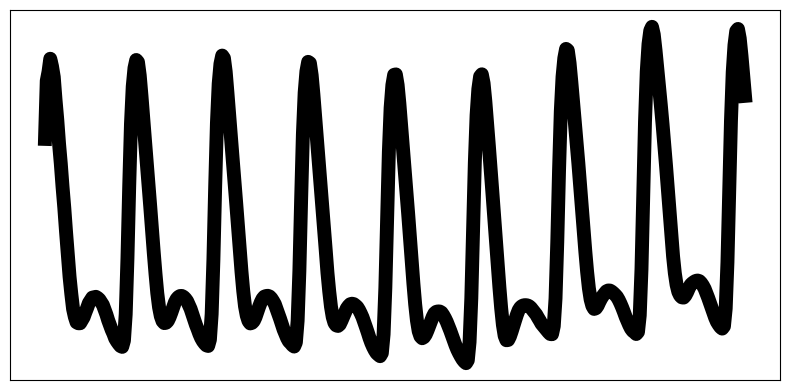

In [106]:
# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(ART[10][:400], label='Original Signal', color='black', linewidth=10)
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal')
fig.tight_layout()
fig.savefig('ART_OriginalCleaned2.png', transparent =True)

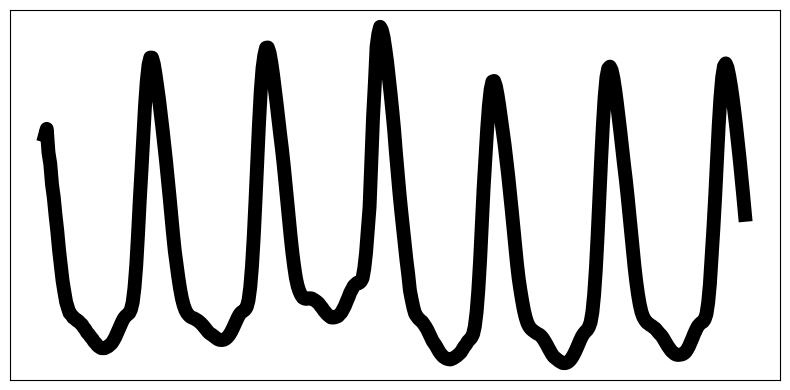

In [107]:
# Original signal and Amplitude filtered signal
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(PPG[4][:400], label='Original Signal', color='black', linewidth=10)
ax.set_xticks([])  # Hide x-axis values
ax.set_yticks([])  # Hide y-axis values
#ax.legend(loc='upper right')
#ax.set_title('Cleaned Signal')
fig.tight_layout()
fig.savefig('PPG_OriginalCleaned2.png', transparent =True)